# Analysis of the paths 


The analysis is made under the assumption that people are doing their best when playing.
- Extraction of the length of the paths
    - TO DO:
        - Reduce computational power (Hashing, code improvement,...) 
            
            
- Reproduction of the optimal path, or inspiration or use of https://www.sixdegreesofwikipedia.com/
    - TO DO: (This task is going to be the thoughest, seems quite difficult but feasible.)
        - Implement a local version of the website (Many optimal paths possible)
            - Creation of the SQLITE database
            - Running of the local website 
        
        
- Comparison to the optimal one (Most important part of the analysis) 
    - TO DO: (Once optimal paths are found) 
        - Apply the comparison, extract the deviations from the optimal path (From the results of other group members analysis
            - From deviations, towards which category / concepts / words are people drawn ? Link with the influence of the environment.
            - By which factor are people biased ? 
            - From optimal paths, which category contains the most informations / is the most useful to get the fastest ? 
            - Apply to optimal paths, which category contains the most informations ? Link with position of the links

### Goals of P2
- Get acquainted with data
- preprocess it
- complete descriptive statistics tasks 
***
### Expectations
- Pipeline in place
- Documentend notebook
- Show clear project goals
### Exemples of what we should show: 
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

        

In [2]:
#Import of the library
import numpy as np
from urllib.parse import unquote
import matplotlib.pyplot as plt 

import pandas as pd 
from tqdm import trange
import pickle as pkl
import pandas as pd 

## Data Wrangling
***
### Matrix of shortest path
In order to compare average users paths with the optimal ones.

In [3]:
#%%timeit -r 1 -n 1

# Function to write the matrix in an annex file, to save some time 
def shortest_path_matrix_writing():
    number_of_words = 4604 #Given data
    with open("wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt", "r") as f:
        shortest_distance_matrix = np.zeros((number_of_words,number_of_words))
        for i in range(17):
            f.readline()
        for i, line in enumerate(f) :
            line = line.strip('\n')
            for j, number in enumerate(line):
                if number == '_': #replacing impossible paths with nans
                    number = np.nan
                else:
                    number = int(number)
                shortest_distance_matrix[i,j] = number
    np.save("data/shortest_distance_matrix", shortest_distance_matrix)
    return 


In [4]:
shortest_distance_matrix = np.load("data/shortest_distance_matrix.npy")
number_of_words = 4604

Following initial analysis

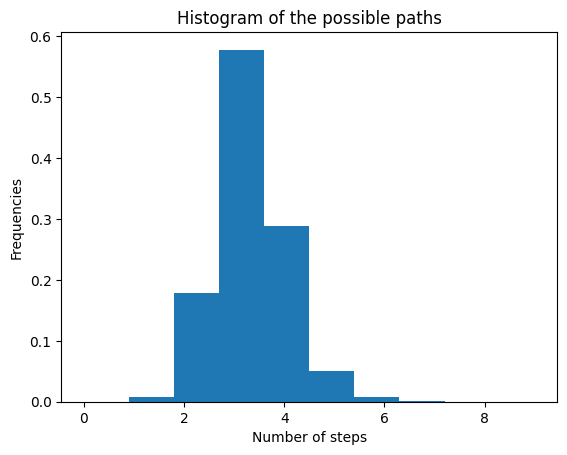

Mean of shortest paths: 3.2
Median: 3.2
Frequence of impossible paths: 0.12 


In [5]:
d1_shortest_matrix = np.reshape(shortest_distance_matrix ,-1)
plt.hist(d1_shortest_matrix, bins = 10, density = True)
plt.xlabel("Number of steps")
plt.ylabel("Frequencies")
plt.title("Histogram of the possible paths")
plt.show()
print("Mean of shortest paths: %.1f" % (np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)])))
print("Median: %.1f" % np.mean(d1_shortest_matrix[~np.isnan(d1_shortest_matrix)]))
print("Frequence of impossible paths: %.2f " %
      (len(d1_shortest_matrix[np.isnan(d1_shortest_matrix)])/len(d1_shortest_matrix)))

### Articles dataset
In order to associate path with names as the shortest path matrix in the same order as articles.

We use the library urllib.parse in order to decode from URL.

By using %%timeit, we notice a notable time difference in execution time when decoding from URL. 

We decide not to decode it straightaway but only when it is necessary (when we need to know the name of the article) as it is for now not necessary to decode the URL encoding for the names of the articles. 

In [6]:
articles = pd.read_csv("wikispeedia_paths-and-graph/articles.tsv",
                         sep = '\t', skiprows = 12, names = ['article'])


In [7]:

def article_parse(article):
    article = unquote(article).replace('_', ' ')
    return article
articles['article_decoded']= articles.article.apply(article_parse)


In [8]:
articles

,article,article_decoded
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Áedán mac Gabráin
1,%C3%85land,Åland
2,%C3%89douard_Manet,Édouard Manet
3,%C3%89ire,Éire
4,%C3%93engus_I_of_the_Picts,Óengus I of the Picts
...,...,...
4599,Zionism,Zionism
4600,Zirconium,Zirconium
4601,Zoroaster,Zoroaster
4602,Zuid-Gelders,Zuid-Gelders


In [9]:
count = 0
for i in range(number_of_words):
    if articles['article'][i] !=  articles['article_decoded'][i]:
        count += 1
print("Fraction of the encoded words: %.2f" % (count/number_of_words))
    

Fraction of the encoded words: 0.62


***
### Categories data
In order to infer a categorie favored by the players.

Many articles have several categories, some have none. 

There's 129 categories

Max is subject.Countries with 229
Min is subject.Art.Artists with 2
Median is at 27
Mean is at 40
Categories ranked by number of article they contain:

                                                    article
category                                                   
subject.Countries                                       229
subject.Science.Biology.Birds                           161
subject.Geography.Geography_of_Great_Britain            124
subject.Science.Chemistry.Chemical_elements             119
subject.Science.Biology.Mammals                         114
...                                                     ...
subject.Geography.Antarctica                              8
subject.People.Chemists                                   8
subject.People.Producers_directors_and_media_fi...        8
subject.IT.Cryptography                                   6
subject.Art.Artists                                       2

[129 rows x 1 columns]


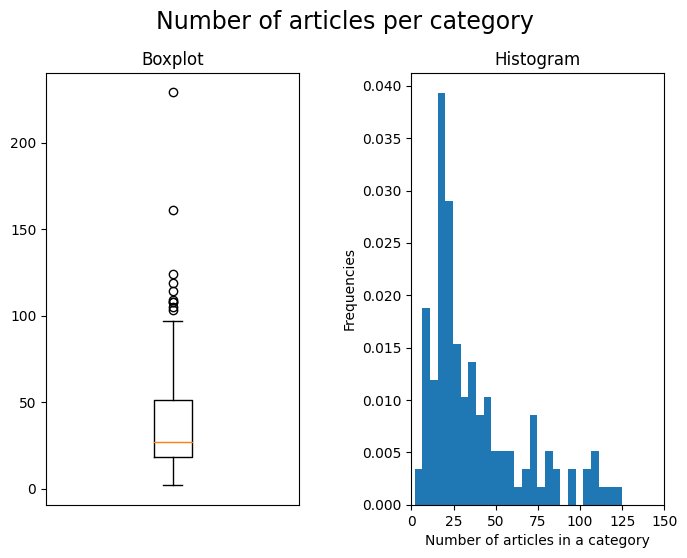

In [10]:
categories = pd.read_csv("wikispeedia_paths-and-graph/categories.tsv",
                         sep = '\t', skiprows = 13, names = ['article', 'category'])
#print(nb_by_cat)
categories['article']= categories.article.apply(article_parse)

nb_by_cat = categories.groupby('category').count()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (8,6))
fig.tight_layout(pad = 5)
fig.suptitle('Number of articles per category', fontsize = 17)

ax[1].hist(nb_by_cat, bins = 50, density = True)
ax[0].boxplot(nb_by_cat)
ax[1].set_title("Histogram")
ax[0].set_title("Boxplot")
ax[1].set_xlabel('Number of articles in a category')
ax[1].set_ylabel('Frequencies')
ax[0].set_xticks([])
ax[1].set_xlim([0,150])

print("There's %d categories\n" % len(nb_by_cat))
print("Max is %s with %d\nMin is %s with %d\nMedian is at %d\nMean is at %d" % 
      (nb_by_cat['article'].idxmax(), max(nb_by_cat['article']),nb_by_cat['article'].idxmin(), 
       min(nb_by_cat['article']),nb_by_cat['article'].median(), nb_by_cat['article'].mean()))

pd.set_option('display.max_rows', 10)
print("Categories ranked by number of article they contain:\n")
print(nb_by_cat.sort_values('article', ascending = False))

In [11]:
categories

,article,category
0,Áedán mac Gabráin,subject.History.British_History.British_Histor...
1,Áedán mac Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


***
### Paths data 
In order to analyze the players behaviour (only finished paths)

In [12]:
paths_finished = pd.read_csv("wikispeedia_paths-and-graph/paths_finished.tsv", 
                             sep = '\t', skiprows = 16, usecols = [3], names = ['paths'])

### Analysis of the paths

When we look for certains user's paths length average, we want to get the index of the intial and final words to obtain the comparison with optimal length. 

Assuming we ignore when they go back.

The words need to be accessible for later

In [13]:
def paths_pickled(step):
    
    header = ['index_initial', 'index_final','length_path','length_path_bs','path', 'path_backslash']
    paths_unpacked = pd.DataFrame(columns = header, dtype = object)
    
    for j in trange(0,len(paths_finished),step):
        
        each_word_bs = paths_finished['paths'][j].split(';')
        path_bs_length = len(each_word_bs)
        each_word = paths_finished['paths'][j].replace('<;', '').split(';') # .replace() to ignore when they go back
        
        path_length = len(each_word)
        index_initial = articles.index(each_word[0])
        index_final  = articles.index(each_word[-1])
        
        to_df = [index_initial, index_final, path_length, path_bs_length, each_word, each_word_bs]
        
        paths_unpacked.loc[j] = to_df
        
    paths_unpacked.to_pickle("data/paths_dataframe.pkl")

        
    return 



    #print("Beginning: %s \t End: %s" % (each_word[0], each_word[-1]))
    #print("Length of the path: %15d" % int(len(each_word)))
    #print("Length of the optimal path: %7d"  % shortest_distance_matrix[index_initial, index_final])

In [14]:
paths_unpacked = pd.read_pickle("data/paths_dataframe.pkl")
paths_unpacked
#paths_unpacked['path'] = paths_unpacked.path.apply(article_parse)


,index_initial,index_final,length_path,length_path_bs,path,path_backslash
0,10,143,9,9,"[14th century, 15th century, 16th century, Pac...","[14th century, 15th century, 16th century, Pac..."
1,10,143,5,5,"[14th century, Europe, Africa, Atlantic slave ...","[14th century, Europe, Africa, Atlantic slave ..."
2,10,143,8,8,"[14th century, Niger, Nigeria, British Empire,...","[14th century, Niger, Nigeria, British Empire,..."
3,10,1793,4,4,"[14th century, Renaissance, Ancient Greece, Gr...","[14th century, Renaissance, Ancient Greece, Gr..."
4,10,2266,7,7,"[14th century, Italy, Roman Catholic Church, H...","[14th century, Italy, Roman Catholic Church, H..."
...,...,...,...,...,...,...
51313,4558,928,3,3,"[Yagan, Ancient Egypt, Civilization]","[Yagan, Ancient Egypt, Civilization]"
51314,4558,1500,8,9,"[Yagan, Folklore, Brothers Grimm, 19th century...","[Yagan, Folklore, Brothers Grimm, 19th century..."
51315,4558,4273,7,7,"[Yagan, Australia, England, France, United Sta...","[Yagan, Australia, England, France, United Sta..."
51316,4562,97,4,4,"[Yarralumla%2C Australian Capital Territory, A...","[Yarralumla%2C Australian Capital Territory, A..."


Descriptive statistics of the finished_paths datas

Max:   420.0
Mean:    6.4
Median:  6.0
Median:  6.0


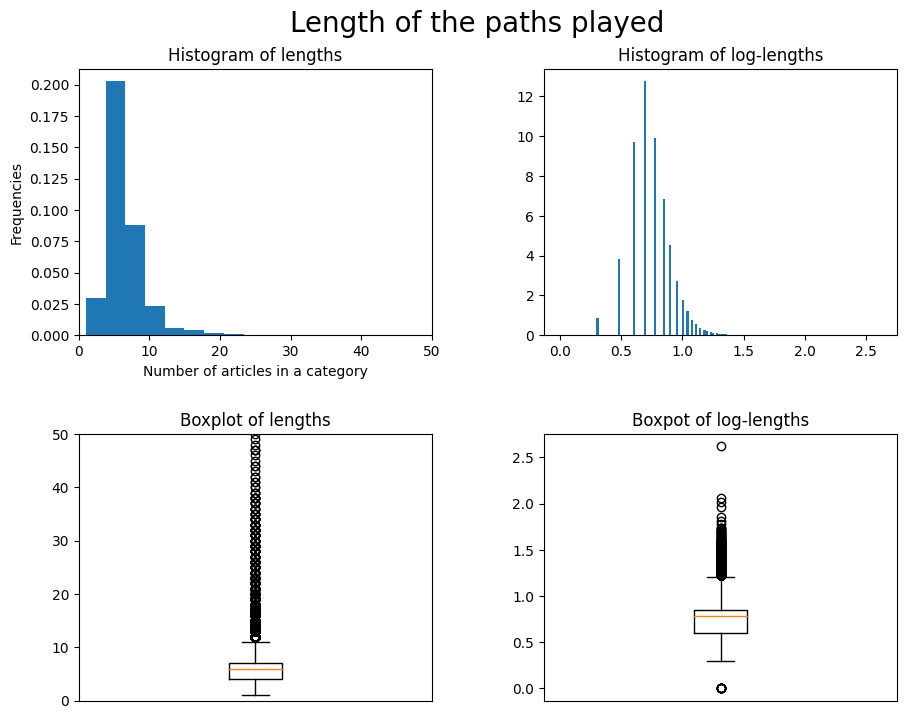

In [15]:
path_lengths = paths_unpacked['length_path']
path_lengths_bs = paths_unpacked['length_path_bs']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize= (10, 8))
fig.tight_layout(pad = 5)
fig.suptitle('Length of the paths played', fontsize = 20)


ax[0,0].hist(path_lengths, bins = 150, density = True)
ax[0,1].hist(np.log10(paths_unpacked['length_path'].astype(float)), bins = 150, density = True )
ax[1,0].boxplot(path_lengths)
ax[1,1].boxplot(np.log10(paths_unpacked['length_path'].astype(float)))
ax[0,0].set_title("Histogram of lengths")
ax[0,1].set_title("Histogram of log-lengths")
ax[1,0].set_title("Boxplot of lengths")
ax[1,1].set_title("Boxpot of log-lengths")

ax[0,0].set_xlim([0,50])
ax[1,0].set_ylim([0,50])
ax[0,0].set_xlabel('Number of articles in a category')
ax[0,0].set_ylabel('Frequencies')
ax[1,0].set_xticks([])
ax[1,1].set_xticks([]);

print("Max: % 7.1f" % max(path_lengths))
print("Mean: %6.1f" % path_lengths.mean())
print("Median: %4.1f" % path_lengths.median())
print("Median: %4.1f" % path_lengths_bs.median())



From this initial analysis, it seems players use 3 more clicks in average than optimal paths

***
## Following steps

Once the optimal paths are found, we will be able to establish a comparison between the optimal and the played paths. 

Everytime a player plays a move that make the paths get 1 step longer, we will consider it a 'sub-optimal' decision and try to find a explanation from the different factors studied. For example: a decision induced by an external event, or the position of the links in the page.

The analysis will be carried on the word inducing the 'sub-optimal' decision by analyzing it's charachteristics (what categories of links are present on the page, their respective position, the numbers of game played (win/loose) played before,...) 

In [16]:
from collections import deque
import pandas as pd
import networkx as nx

In [17]:
links_in_pages = pd.read_pickle('data/links_in_pages_DF.pkl')
lip = links_in_pages.drop_duplicates(subset = ['page', 'link'])

lip = lip[['page', 'link']]
data_grouped = lip.groupby("page")
# Create a dictionary from each group, with the page name as the key
data_dict = data_grouped.apply(lambda x: {x.name: x["link"].tolist()})

dict_data = {}
for key in data_dict:
    dict_data.update(key)

titles = lip['page'].unique()


In [18]:
D = nx.DiGraph()
D.add_nodes_from(dict_data.keys())

for key in dict_data.keys():
    for item in dict_data[key]:
        D.add_edge(key, item)
print(D)

DiGraph with 13235 nodes and 132815 edges


In [19]:
def errors_to_pickle(step):
    error_df = pd.DataFrame(columns = ['step_error',  'page', 'objective','click_sub_optimal','category_click_sub_opti', 'optimal_choices_missed', 'cat_optimal_choices',  'optimal_paths','path_taken'])

    for i in trange(step):
        algorithm = nx.all_shortest_paths(D, articles.article_decoded[paths_unpacked['index_initial'][i]], articles.article_decoded[paths_unpacked['index_final'][i]])
        paths = [p for p in algorithm]
        optimal_choices_missed = []
        if len(paths_unpacked['path'][i]) <= len(paths[0]):
                continue
        mistake = 0
        for index, click in enumerate(paths_unpacked['path'][i][1:-1]):
            if mistake:
                break 
            for p in paths:
                if click == p[index+1]:
                    mistake = 0
                    optimal_choices_missed = []
                    clicked_wrongly = None
                    break
                else:
                    optimal_choices_missed.append(p[index+1])
                    mistake = 1
                    clicked_wrongly = article_parse(click)
                    index_error = index + 1
        optimal_choices_missed = list(set(optimal_choices_missed))
        
        cat_optimal_choices = [categories[categories.article == optimal_choices_missed[i]].category.values[0] for i in range(len(optimal_choices_missed))]
            
        error_df.loc[i] = [index_error,  paths_unpacked['path'][i][index_error-1], articles.article[paths_unpacked['index_final'][index]], clicked_wrongly, categories[categories.article == clicked_wrongly].category.values[0],
                           optimal_choices_missed,cat_optimal_choices, paths, paths_unpacked['path'][i]]
    return error_df
error_df = errors_to_pickle(250)
error_df
#error_df.to_pickle('data/error_dataframe.pkl')

100%|██████████| 250/250 [00:11<00:00, 21.85it/s]


,step_error,page,objective,click_sub_optimal,category_click_sub_opti,optimal_choices_missed,cat_optimal_choices,optimal_paths,path_taken
0,1,14th century,African_slave_trade,15th century,subject.History.General_history,"[Lithuania, Pope, Poland]","[subject.Countries, subject.Religion.Religious...","[[14th century, Pope, Pope John Paul II, Afric...","[14th century, 15th century, 16th century, Pac..."
1,1,14th century,African_slave_trade,Europe,subject.Geography.European_Geography,"[Lithuania, Pope, Poland]","[subject.Countries, subject.Religion.Religious...","[[14th century, Pope, Pope John Paul II, Afric...","[14th century, Europe, Africa, Atlantic slave ..."
2,1,14th century,African_slave_trade,Niger,subject.Geography.African_Geography.African_Co...,"[Lithuania, Pope, Poland]","[subject.Countries, subject.Religion.Religious...","[[14th century, Pope, Pope John Paul II, Afric...","[14th century, Niger, Nigeria, British Empire,..."
3,1,14th century,African_slave_trade,Renaissance,subject.History.General_history,"[England, Washington, D.C., Europe, Time, Ital...","[subject.Geography.Geography_of_Great_Britain,...","[[14th century, Washington, D.C., Greece], [14...","[14th century, Renaissance, Ancient Greece, Gr..."
4,2,Italy,African_slave_trade,Roman Catholic Church,subject.Religion.Religious_movements_tradition...,"[Winston Churchill, Cold War, United States, B...",[subject.History.British_History.British_Histo...,"[[14th century, India, Cold War, John F. Kenne...","[14th century, Italy, Roman Catholic Church, H..."
...,...,...,...,...,...,...,...,...,...
244,2,Earth,African_slave_trade,Moon,subject.Science.Physics.Space_Astronomy,[Sun],[subject.Science.Physics.Space_Astronomy],"[[Africa, Asia, Sun], [Africa, Earth, Sun], [A...","[Africa, Earth, Moon, Solar System, Sun]"
245,1,Africa,African_slave_trade,Continent,subject.Geography.General_Geography,"[Gold, Nile, Asia, Earth]","[subject.Science.Chemistry.Chemical_elements, ...","[[Africa, Asia, Sun], [Africa, Earth, Sun], [A...","[Africa, Continent, Earth, Sun]"
246,1,Africa,African_slave_trade,Continent,subject.Geography.General_Geography,"[Gold, Nile, Asia, Earth]","[subject.Science.Chemistry.Chemical_elements, ...","[[Africa, Asia, Sun], [Africa, Earth, Sun], [A...","[Africa, Continent, Earth, Sun]"
248,1,Africa,African_slave_trade,African Great Lakes,subject.Geography.African_Geography,[Temperate],[subject.Science.Physics.General_Physics],"[[Africa, Temperate]]","[Africa, African Great Lakes, Rainforest, Trop..."


In [26]:
print(paths_unpacked['path'][241])
print(paths_unpacked['index_initial'][241], paths_unpacked['index_final'][241])
print(articles.article[128], articles.article[3791]) 
print(shortest_distance_matrix[128][3791])
test = nx.all_shortest_paths(D, 'Africa', 'Solar System')
paths = [p for p in test]
print('there are %s shortest paths of lenght %s, and one one them is \n %s'% (len(paths), len(paths[0]), paths[0]))


['Africa', 'Earth', 'Solar System']
128 3791
Africa Solar_System
2.0
there are 9 shortest paths of lenght 4, and one one them is 
 ['Africa', 'Earth', 'Moon', 'Solar System']


In [27]:
#error_df = pd.read_pickle('data/error_dataframe.pkl')
error_df.groupby(['category_click_sub_opti']).count()['cat_optimal_choices']

category_click_sub_opti
subject.Business_Studies.Currency               2
subject.Citizenship.Community_organisations     1
subject.Citizenship.Media                       1
subject.Citizenship.Politics_and_government     4
subject.Countries                              11
                                               ..
subject.Science.Chemistry.General_Chemistry     2
subject.Science.Physics.General_Physics        10
subject.Science.Physics.Space_Astronomy         2
subject.Science.Physics.Space_transport         2
subject.Science.Physics.The_Planets             2
Name: cat_optimal_choices, Length: 45, dtype: int64

In [28]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(error_df.cat_optimal_choices).value_counts()

subject.Countries                                        240
subject.Geography.African_Geography.African_Countries    165
subject.Geography.General_Geography                      143
subject.Geography.African_Geography                      118
subject.Language_and_literature.Languages                114
                                                        ... 
subject.Science.Biology.Birds                              1
subject.People.USA_Presidents                              1
subject.Everyday_life.Recreation                           1
subject.Everyday_life.Films                                1
subject.People.Actors_models_and_celebrities               1
Length: 86, dtype: int64

In [29]:
nb_by_cat

,article
category,
subject.Art.Art,36
subject.Art.Artists,2
subject.Business_Studies.Business,28
subject.Business_Studies.Companies,18
subject.Business_Studies.Currency,14
...,...
subject.Science.Physics.Electricity_and_Electronics,20
subject.Science.Physics.General_Physics,55
subject.Science.Physics.Space_Astronomy,105


In [23]:
error_df['click_sub_optimal'][0]
#categories.loc[categories['article'].str.contains(error_df['click_sub_optimal'][1], case = False)]
categories[categories.article == error_df['click_sub_optimal'][1]].values[0][1]

'subject.Geography.European_Geography'

In [24]:
categories['category']

0       subject.History.British_History.British_Histor...
1                       subject.People.Historical_figures
2                                       subject.Countries
3       subject.Geography.European_Geography.European_...
4                                  subject.People.Artists
                              ...                        
5199          subject.Science.Chemistry.Chemical_elements
5200         subject.People.Religious_figures_and_leaders
5201                 subject.Geography.European_Geography
5202            subject.Language_and_literature.Languages
5203                  subject.Geography.African_Geography
Name: category, Length: 5204, dtype: object

In [25]:
categories.loc[categories['article'].str.contains('Pope', case = False)]

,article,category
2842,List of popes,subject.People.Religious_figures_and_leaders
3730,Pope,subject.Religion.Religious_movements_tradition...
3731,Pope Benedict XVI,subject.People.Religious_figures_and_leaders
3732,Pope John Paul II,subject.People.Religious_figures_and_leaders
3733,Pope Pius XII,subject.People.Religious_figures_and_leaders


In [31]:
git config --global user.name "Brotherson Teva"
git config --global user.email "teva.brotherson@epfl.ch"

SyntaxError: invalid syntax (1263794934.py, line 1)